<a href="https://colab.research.google.com/github/Vaishnavisharan/Machine_Learning-Project/blob/main/Store_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING LIBRARIES 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import seaborn as sns 

LOADING TRAINING DATA SET 

In [2]:
train=pd.read_csv('stocktrain.csv',index_col='date',parse_dates=True)

In [3]:
train.head()

,id,store_nbr,family,sales,onpromotion
date,,,,,
2013-01-01,0,1,AUTOMOTIVE,0.0,0
2013-01-01,1,1,BABY CARE,0.0,0
2013-01-01,2,1,BEAUTY,0.0,0
2013-01-01,3,1,BEVERAGES,0.0,0
2013-01-01,4,1,BOOKS,0.0,0


In [4]:
train.shape

(1048575, 5)

In [5]:
train.dtypes

id               int64
store_nbr        int64
family          object
sales          float64
onpromotion      int64
dtype: object

In [6]:
train.describe()

,id,store_nbr,sales,onpromotion
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,5.242870e+05,2.749256e+01,2.445326e+02,6.991469e+00
std,3.026977e+05,1.558408e+01,8.065892e+02,4.117126e+01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,2.621435e+05,1.400000e+01,0.000000e+00,0.000000e+00
50%,5.242870e+05,2.700000e+01,1.000000e+00,0.000000e+00
75%,7.864305e+05,4.100000e+01,1.200000e+02,0.000000e+00
max,1.048574e+06,5.400000e+01,4.627100e+04,6.390000e+02


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1048575 entries, 2013-01-01 to 2014-08-13
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   id           1048575 non-null  int64  
 1   store_nbr    1048575 non-null  int64  
 2   family       1048575 non-null  object 
 3   sales        1048575 non-null  float64
 4   onpromotion  1048575 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 48.0+ MB


GROUPING BY THERE VALUES COUNTS 

In [8]:
train['family'].value_counts()

BOOKS                         31775
EGGS                          31775
PERSONAL CARE                 31775
SCHOOL AND OFFICE SUPPLIES    31775
PET SUPPLIES                  31775
HOME AND KITCHEN II           31775
HOME AND KITCHEN I            31775
BEAUTY                        31775
BREAD/BAKERY                  31775
PLAYERS AND ELECTRONICS       31775
FROZEN FOODS                  31775
CLEANING                      31775
SEAFOOD                       31775
MAGAZINES                     31775
LADIESWEAR                    31775
POULTRY                       31775
PRODUCE                       31775
MEATS                         31775
CELEBRATION                   31775
HARDWARE                      31775
HOME CARE                     31775
PREPARED FOODS                31775
LAWN AND GARDEN               31775
AUTOMOTIVE                    31775
BABY CARE                     31775
DELI                          31775
LINGERIE                      31775
GROCERY I                   

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f47ca7a0fd0>,
      dtype=object)

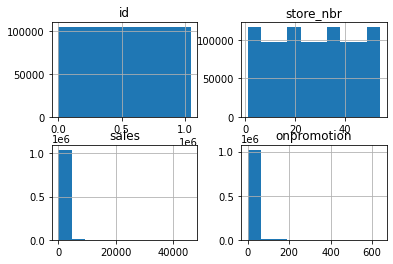

In [9]:
train.hist()

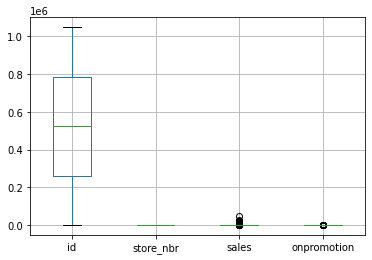

In [10]:
train.boxplot()

NULL VALUES CHECKING 

In [11]:
train.isnull().sum()

id             0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

DATA PREPROCESSINING 

In [12]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
train['family']=le.fit_transform(train['family'])

LOADINING TEST DATA SET 

In [13]:
test=pd.read_csv('stocktest.csv',index_col='date',parse_dates=True)

In [14]:
test.head()

,id,store_nbr,family,onpromotion
date,,,,
2017-08-16,3000888,1,AUTOMOTIVE,20
2017-08-16,3000889,1,BABY CARE,1
2017-08-16,3000890,1,BEAUTY,8
2017-08-16,3000891,1,BEVERAGES,560
2017-08-16,3000892,1,BOOKS,1


In [15]:
test.shape

(28512, 4)

In [16]:
test.describe()

,id,store_nbr,onpromotion
count,2.851200e+04,28512.000000,28512.000000
mean,3.015144e+06,27.500000,118.212121
std,8.230850e+03,15.586057,240.272972
min,3.000888e+06,1.000000,1.000000
25%,3.008016e+06,14.000000,14.000000
50%,3.015144e+06,27.500000,29.000000
75%,3.022271e+06,41.000000,90.000000
max,3.029399e+06,54.000000,1277.000000


In [17]:
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 28512 entries, 2017-08-16 to 2017-08-31
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           28512 non-null  int64 
 1   store_nbr    28512 non-null  int64 
 2   family       28512 non-null  object
 3   onpromotion  28512 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.1+ MB


CHECKING FOR THE NULL VALUES 

In [18]:
test.isnull().sum()

id             0
store_nbr      0
family         0
onpromotion    0
dtype: int64

GROUPING BY THERE VALUE COUNTS 

In [19]:
test['family'].value_counts()

PLAYERS AND ELECTRONICS       864
LINGERIE                      864
BOOKS                         864
HOME CARE                     864
DELI                          864
EGGS                          864
BREAD/BAKERY                  864
PRODUCE                       864
FROZEN FOODS                  864
SCHOOL AND OFFICE SUPPLIES    864
MAGAZINES                     864
HARDWARE                      864
PERSONAL CARE                 864
GROCERY I                     864
BEVERAGES                     864
LIQUOR,WINE,BEER              864
HOME AND KITCHEN I            864
LAWN AND GARDEN               864
LADIESWEAR                    864
CELEBRATION                   864
AUTOMOTIVE                    864
BABY CARE                     864
CLEANING                      864
BEAUTY                        864
PREPARED FOODS                864
DAIRY                         864
PET SUPPLIES                  864
MEATS                         864
GROCERY II                    864
HOME AND KITCH

In [20]:
test['family']=le.fit_transform(test['family'])

ASSINING X AND Y VALUES 

In [21]:
x=train.drop('sales',axis=1)
y=train['sales']

SPLITTING TRAINING AND TEST DATA 

In [22]:
from sklearn .model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.2,random_state=4)

STANDARDISE THE DATA 

In [23]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler().fit(x_train)
scalar = StandardScaler().fit(x_test)

In [24]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2score
from sklearn.metrics import mean_absolute_error as mae

LINEAR REGRESSION MODEL 

In [25]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()

In [26]:
lr.fit(x_train , y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

TRAINING DATA PREDICTION

In [27]:
training_prediction=lr.predict(x_train)
training_prediction

array([210.51811064, 342.2107482 , 183.97463578, ..., 103.00028172,
       100.14518471, 271.41944715])

In [28]:
y_train

date
2013-06-03       0.00
2013-02-26       0.00
2014-07-27       0.00
2013-08-21       3.00
2013-04-24       0.00
               ...   
2013-09-03    1510.82
2013-07-31       5.00
2013-09-30      23.00
2014-12-07       2.00
2014-07-17     174.00
Name: sales, Length: 838860, dtype: float64

GRAPH BETWEEN TRAINING DATA  AND Y_TRAIN

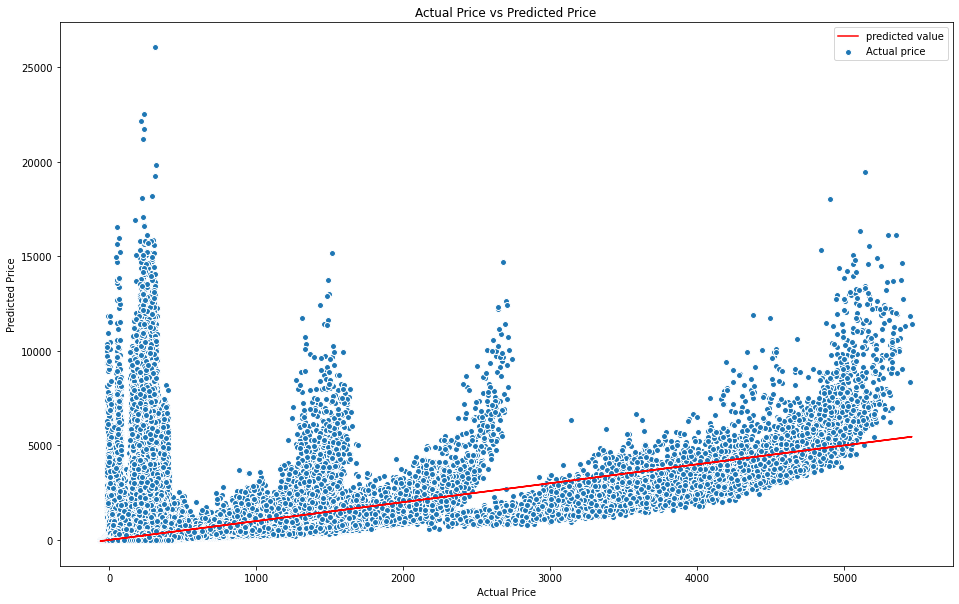

In [29]:
plt.figure(1,figsize=(16,10))
plt.scatter(training_prediction,y_train,edgecolors='w',label='Actual price')
plt.plot(training_prediction,lr.predict(x_train),color='r',label='predicted value')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.legend()
plt.show()

SCORES OF Y_TRAIN 

In [30]:
score1=r2score(y_train,training_prediction)
score2=mse(y_train,training_prediction)
score3=mae(y_train,training_prediction)
print('r2_score  :',score1)
print('mse_score :',score2)
print('mae_score :',score3)

r2_score  : 0.1888446600113467
mse_score : 523301.362428876
mae_score : 300.77131005169014


TESTING DATA PREDICTION

In [31]:
testing_data_prediction=lr.predict(x_test)
testing_data_prediction

array([173.50843901, 271.75630997, 231.48224699, ..., 272.72920358,
        94.9760688 ,  93.78378657])

In [32]:
y_test

date
2014-04-20     125.302
2014-07-16      11.000
2014-08-06       0.000
2014-03-22    1421.000
2013-08-15     363.643
                ...   
2013-08-22     128.315
2014-03-24     380.000
2013-02-21      23.000
2013-08-19      15.335
2014-07-02       0.000
Name: sales, Length: 209715, dtype: float64

GRAPH BETWEEN  TESTING DATA AND Y_TEST 

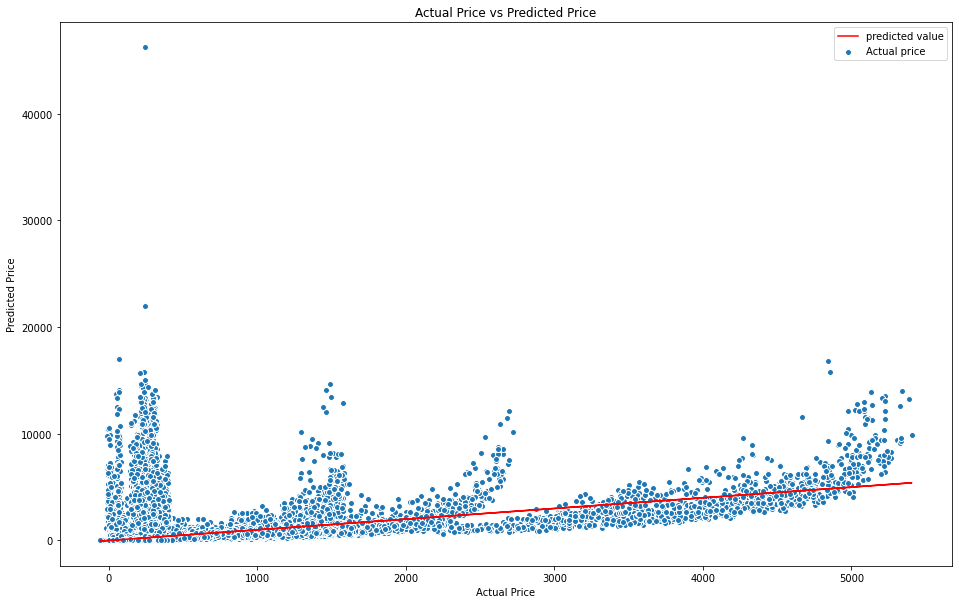

In [33]:
plt.figure(1,figsize=(16,10))
plt.scatter(testing_data_prediction,y_test,edgecolors='w',label='Actual price')
plt.plot(testing_data_prediction,lr.predict(x_test),color='r',label='predicted value')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.legend()
plt.show()

SCORES OF Y_TEST 

In [34]:
score1=r2score(y_test,testing_data_prediction)
score2=mse(y_test,testing_data_prediction)
score3=mae(y_test,testing_data_prediction)
print('r2_score  :',score1)
print('mse_score :',score2)
print('mae_score :',score3)

r2_score  : 0.18817147279752977
mse_score : 545873.9076079165
mae_score : 301.9632664374159


RIDGE REGRESSION 

In [35]:
from sklearn.linear_model import Ridge
rr=Ridge()

In [36]:
rr.fit(x_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

TRAINING DATA PREDICTION 

In [37]:
training_data_prediction=rr.predict(x_train)
training_data_prediction

array([210.51811128, 342.210747  , 183.97463491, ..., 103.0002826 ,
       100.14518525, 271.41944647])

In [38]:
y_train

date
2013-06-03       0.00
2013-02-26       0.00
2014-07-27       0.00
2013-08-21       3.00
2013-04-24       0.00
               ...   
2013-09-03    1510.82
2013-07-31       5.00
2013-09-30      23.00
2014-12-07       2.00
2014-07-17     174.00
Name: sales, Length: 838860, dtype: float64

GRAPH BETWEEN TRAINING DATA AND Y_TRAIN

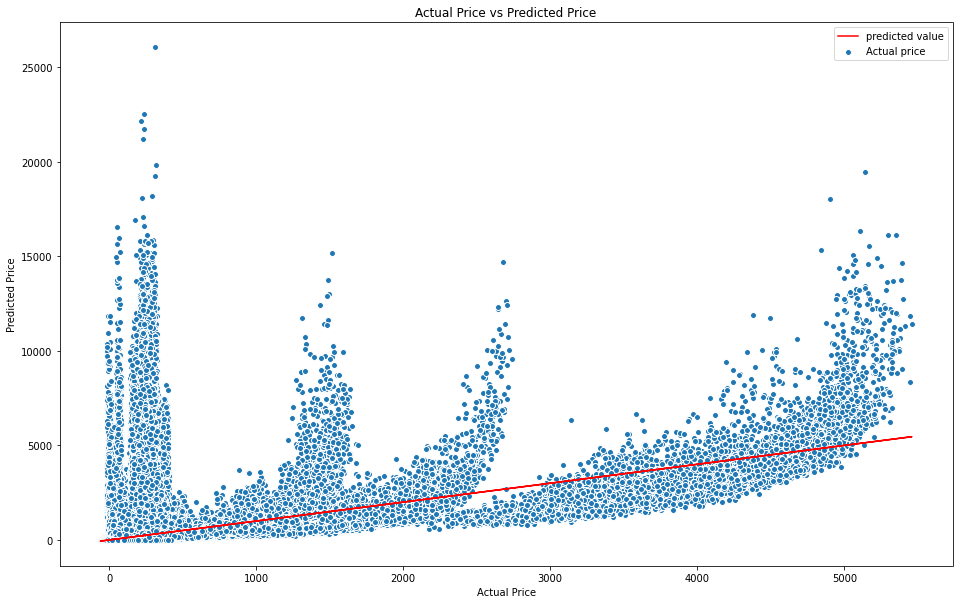

In [39]:
plt.figure(1,figsize=(16,10))
plt.scatter(training_data_prediction,y_train,edgecolors='w',label='Actual price')
plt.plot(training_data_prediction,rr.predict(x_train),color='r',label='predicted value')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.legend()
plt.show()

SCORES OF Y_TRAIN 

In [40]:
score1=r2score(y_train,training_data_prediction)
score2=mse(y_train,training_data_prediction)
score3=mae(y_train,training_data_prediction)
print('r2_score  :',score1)
print('mse_score :',score2)
print('mae_score :',score3)

r2_score  : 0.18884466001134648
mse_score : 523301.36242887616
mae_score : 300.7713100308448


TESTING DATA PREDICTION 

In [41]:
testing_prediction=rr.predict(x_test)
testing_prediction

array([173.50844039, 271.75630836, 231.48224585, ..., 272.72920301,
        94.97607047,  93.78378716])

In [42]:
y_test

date
2014-04-20     125.302
2014-07-16      11.000
2014-08-06       0.000
2014-03-22    1421.000
2013-08-15     363.643
                ...   
2013-08-22     128.315
2014-03-24     380.000
2013-02-21      23.000
2013-08-19      15.335
2014-07-02       0.000
Name: sales, Length: 209715, dtype: float64

GRAPH BETWEEN TESTING DATA AND Y_TEST

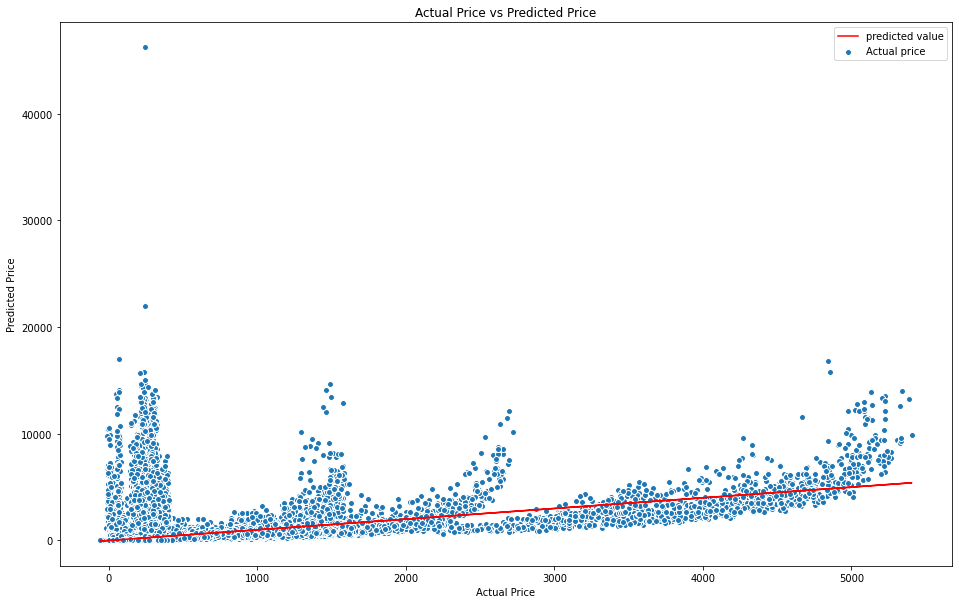

In [43]:
plt.figure(1,figsize=(16,10))
plt.scatter(testing_prediction,y_test,edgecolors='w',label='Actual price')
plt.plot(testing_prediction,rr.predict(x_test),color='r',label='predicted value')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.legend()
plt.show()

SCORES OF Y_TEST  

In [44]:
score1=r2score(y_test,testing_prediction)
score2=mse(y_test,testing_prediction)
score3=mae(y_test,testing_prediction)
print('r2_score  :',score1)
print('mse_score :',score2)
print('mae_score :',score3)

r2_score  : 0.18817147279771762
mse_score : 545873.9076077902
mae_score : 301.963266421736
